# Data Profile Comparison: Clean vs Non-IID Mild vs Non-IID Hard

This notebook compares the three data generation profiles:
- **`clean`**: IID-like, uniform partitioning (baseline)
- **`non_iid_mild`**: Moderate heterogeneity (realistic industrial conditions)
- **`non_iid_hard`**: Extreme heterogeneity (stress-testing FL)

## Heterogeneity Dimensions

| Dimension | Clean | Mild | Hard |
|-----------|-------|------|------|
| **Label Skew** | Uniform [0,100] | Overlapping ranges | Disjoint ranges |
| **Feature Skew** | Minimal noise | noise ∈ [0.05, 0.2] | noise ∈ [0.05, 1.0] |
| **Quantity Skew** | Balanced | [400, 300, 250, 200, 150] | [800, 200, 150, 50, 300] |
| **Concept Drift** | None | None | After round 8 |

**Goal**: Visually prove that `clean < mild < hard` in difficulty.

In [47]:
import sys
from pathlib import Path
# === LABELED CHANNEL SNAPSHOTS ===
# Display snapshots (time step 0) for: base generator, clean profile, mild, hard
import pandas as pd

channel_names = [
    'Vibration_Accel_X',
    'Vibration_Accel_Y',
    'Vibration_Accel_Z',
    'Vibration_Envelope',
    'Shaft_RPM',
    'Motor_Current_PhaseA',
    'Motor_Current_PhaseB',
    'Motor_Current_PhaseC',
    'Motor_Voltage_RMS',
    'Pump_Discharge_Pressure',
    'Flow_Rate',
    'Bearing_Temperature',
    'Stator_Temperature',
    'Ambient_Fluid_Temp_or_Humidity',
]

try:
    print('\n' + '='*80)
    print('BASE GENERATOR SNAPSHOT (first 10 samples, time step 0)')
    print('='*80)
    df_base = pd.DataFrame(X_clean[:10, 0, :10], columns=channel_names[:10])
    df_base['RUL'] = y_clean[:10]
    display(df_base.round(4))

    print('\n' + '='*80)
    print('CLEAN PROFILE SNAPSHOT (Client 0 — first 10 samples, time step 0)')
    print('='*80)
    X_clean_c, y_clean_c = clean_partitions[0]
    df_clean = pd.DataFrame(X_clean_c[:10, 0, :10], columns=channel_names[:10])
    df_clean['RUL'] = y_clean_c[:10]
    display(df_clean.round(4))

    print('\n' + '='*80)
    print('NON-IID MILD PROFILE SNAPSHOT (Client 0 — first 10 samples, time step 0)')
    print('='*80)
    X_mild_0, y_mild_0 = mild_partitions[0]
    df_mild = pd.DataFrame(X_mild_0[:10, 0, :10], columns=channel_names[:10])
    df_mild['RUL'] = y_mild_0[:10]
    display(df_mild.round(4))

    print('\n' + '='*80)
    print('NON-IID HARD PROFILE SNAPSHOT (Client 0 — first 10 samples, time step 0)')
    print('='*80)
    X_hard_0, y_hard_0 = hard_partitions[0]
    df_hard = pd.DataFrame(X_hard_0[:10, 0, :10], columns=channel_names[:10])
    df_hard['RUL'] = y_hard_0[:10]
    display(df_hard.round(4))

except NameError as e:
    print('One or more required variables are not defined. Run the data generation cells above first.')
    print(e)


# Add project root to path (robust search)
def find_project_root(start=Path.cwd(), markers=('pyproject.toml','README.md','src')):
    p = start
    for _ in range(6):
        for m in markers:
            if (p / m).exists():
                return p
        if p.parent == p:
            break
        p = p.parent
    return start

project_root = find_project_root()
sys.path.insert(0, str(project_root))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("✅ Imports successful!")
print(f"📁 Project root: {project_root}")


BASE GENERATOR SNAPSHOT (first 10 samples, time step 0)


,Vibration_Accel_X,Vibration_Accel_Y,Vibration_Accel_Z,Vibration_Envelope,Shaft_RPM,Motor_Current_PhaseA,Motor_Current_PhaseB,Motor_Current_PhaseC,Motor_Voltage_RMS,Pump_Discharge_Pressure,RUL
0,0.9657,0.6012,0.7284,0.8944,-0.2317,0.6643,1.1083,-0.7186,-0.6941,0.7134,89.528900
1,-0.4690,-0.5976,-0.8886,-0.5136,-0.3211,-0.6109,-0.9557,0.5993,1.1691,-0.3675,89.311798
2,0.7495,1.0470,0.7283,-1.1585,1.0382,0.8151,0.0036,0.4997,-0.3750,-0.8697,86.473503
3,0.8041,-0.7481,0.7312,0.9093,-0.0412,0.6837,-0.3637,0.7838,-0.6497,-0.2458,89.423897
4,0.2243,0.3041,0.7092,-0.4848,-0.1114,0.5630,1.0378,0.6483,1.1373,0.9127,92.529297
5,1.0809,-1.0533,1.0556,-0.0612,-0.4191,-0.0163,0.7382,0.8133,-1.0849,-0.8446,92.690201
6,0.8457,-0.4000,0.3237,-0.6660,-0.7203,0.1773,-0.8988,0.9280,-0.1164,-0.1207,86.970001
7,0.0508,0.5801,-0.4951,-0.5093,-0.2694,-0.6752,1.1159,-0.2395,0.6344,-0.6397,83.185501
8,-0.1647,-0.9789,1.2740,0.5210,-0.3980,0.7266,-0.4955,-0.8871,-1.1549,-0.7423,87.601997
9,-0.4346,-0.5791,-0.5321,-0.3195,-0.8931,0.0260,-1.1998,-0.3861,-0.4350,-0.7812,83.571098



CLEAN PROFILE SNAPSHOT (Client 0 — first 10 samples, time step 0)


,Vibration_Accel_X,Vibration_Accel_Y,Vibration_Accel_Z,Vibration_Envelope,Shaft_RPM,Motor_Current_PhaseA,Motor_Current_PhaseB,Motor_Current_PhaseC,Motor_Voltage_RMS,Pump_Discharge_Pressure,RUL
0,-0.3635,0.9503,1.4772,-0.4935,-0.8137,-0.1432,-0.8866,0.1861,-0.8592,0.9992,74.600403
1,0.6786,0.6997,-0.1303,1.1317,-0.5851,0.3917,-0.4645,-1.0773,0.0218,-0.0904,70.576599
2,-1.0521,0.7083,-0.5378,-0.5809,-0.8836,-0.8641,-1.1131,0.7192,-0.5845,-0.1576,92.441299
3,0.3068,0.2305,0.0858,0.2592,-0.9600,0.8733,0.1624,-1.1847,-0.3040,-0.0881,91.383499
4,-0.9322,-0.4532,-0.1715,-1.1651,1.1827,-0.5390,0.5736,0.8438,-0.8785,-0.7321,88.482903
5,-0.6444,0.6603,-0.0403,-0.6323,0.2159,-0.6738,0.8200,-0.6920,0.6847,0.8036,84.914101
6,-0.9868,-0.8976,-0.6224,0.6622,0.3223,-0.6851,0.3854,-0.5463,-0.1700,1.0355,73.804199
7,0.7993,-0.4495,-0.1457,0.4832,-0.9083,-0.5370,0.4935,0.9558,-0.1165,-0.7162,92.392700
8,-0.6630,0.6778,-0.4579,-0.8727,-0.4605,-1.0192,-0.4561,0.8004,0.5756,0.9929,74.899002
9,0.5359,-0.3716,-0.7714,-0.3927,0.1922,0.7683,-0.1348,-0.6532,0.9012,0.3070,94.248596



NON-IID MILD PROFILE SNAPSHOT (Client 0 — first 10 samples, time step 0)


,Vibration_Accel_X,Vibration_Accel_Y,Vibration_Accel_Z,Vibration_Envelope,Shaft_RPM,Motor_Current_PhaseA,Motor_Current_PhaseB,Motor_Current_PhaseC,Motor_Voltage_RMS,Pump_Discharge_Pressure,RUL
0,0.9553,1.1157,-0.0835,-0.5051,-1.1092,-0.1229,-0.4576,-0.1876,-0.3356,0.2794,54.1769
1,0.9975,-0.5401,0.1867,0.4825,-0.5955,0.2085,-1.0581,0.3746,-1.2730,0.8887,30.7215
2,0.3114,-0.9191,-0.3872,-0.5927,-1.1573,-0.4044,0.5488,0.0110,-1.0506,-0.4076,60.1019
3,-1.0256,0.6291,-0.8774,-1.1240,-0.2644,1.0711,-0.0096,1.0067,-0.9352,0.5768,48.8158
4,-0.4293,0.7072,-0.3104,0.4817,0.1397,1.1174,-0.1200,-0.3220,-1.1876,-0.3147,6.5924
5,0.7669,-0.4540,0.5071,1.0295,1.2010,-0.7413,-0.3703,-0.5683,-0.1576,-0.1135,68.2936
6,-0.6968,-0.3958,-1.1521,0.0709,-0.7553,1.1987,0.3909,0.4872,-0.8216,1.0523,53.2798
7,0.2032,-1.0399,-1.0395,0.5836,0.9173,0.9500,-0.3332,0.4785,1.0281,0.7176,55.0245
8,0.8615,0.7497,0.7045,-0.2935,0.1614,0.7863,-0.7708,0.7128,-0.2504,-0.9003,8.9680
9,-0.5552,0.6055,-0.1441,0.0838,-0.0359,0.8816,1.0363,0.0259,-0.0365,-1.0310,31.5270



NON-IID HARD PROFILE SNAPSHOT (Client 0 — first 10 samples, time step 0)


,Vibration_Accel_X,Vibration_Accel_Y,Vibration_Accel_Z,Vibration_Envelope,Shaft_RPM,Motor_Current_PhaseA,Motor_Current_PhaseB,Motor_Current_PhaseC,Motor_Voltage_RMS,Pump_Discharge_Pressure,RUL
0,0.8480,1.0463,-0.1357,-0.3981,-1.0079,-0.0866,-0.3890,-0.2985,-0.3821,0.3020,11.594600
1,0.9611,-0.3762,0.1380,0.4248,-0.6176,0.1345,-0.8841,0.3253,-1.2619,0.9084,6.902700
2,0.4161,-0.9500,-0.3844,-0.6031,-1.2428,-0.4188,0.6042,0.2088,-1.0157,-0.5414,5.081800
3,-0.9756,0.5462,-1.0387,-1.2196,-0.4158,0.9174,-0.1066,0.8522,-1.0063,0.5061,7.728300
4,-0.3837,0.8513,-0.3145,0.4192,0.2177,0.9271,0.0105,-0.1407,-1.1361,-0.2036,23.485001
5,0.5903,-0.6354,0.5569,1.0989,1.4189,-0.8084,-0.4446,-0.5393,-0.0305,-0.0334,25.707399
6,-0.8195,-0.3943,-1.2158,0.0542,-0.4819,1.0367,0.3991,0.4853,-0.7428,1.0208,19.992800
7,0.2255,-0.8642,-1.0183,0.7165,0.8514,0.8790,-0.2926,0.5638,0.8581,0.6088,20.134001
8,0.8966,0.7200,0.7688,-0.3629,0.0423,0.9387,-0.7973,0.6203,-0.2318,-0.7762,10.826800
9,-0.6130,0.6469,-0.2517,0.1182,-0.0156,0.4840,1.1190,-0.0936,-0.0615,-1.2028,15.802800


✅ Imports successful!
📁 Project root: c:\Users\Atharva Srivastava\Downloads\fedind


In [48]:
# === EXPORT SNAPSHOTS TO CSV ===
from pathlib import Path

output_dir = Path(project_root) / 'experiments' / 'outputs' / 'data_snapshots'
output_dir.mkdir(parents=True, exist_ok=True)

try:
    df_base.to_csv(output_dir / 'snapshot_base_client0_t0.csv', index=False)
    df_clean.to_csv(output_dir / 'snapshot_clean_client0_t0.csv', index=False)
    df_mild.to_csv(output_dir / 'snapshot_mild_client0_t0.csv', index=False)
    df_hard.to_csv(output_dir / 'snapshot_hard_client0_t0.csv', index=False)
    print(f'Saved snapshots to: {output_dir}')
    print('\nFiles:')
    for p in sorted(output_dir.glob('snapshot_*.csv')):
        print(' -', p.name)
except NameError as e:
    print('Snapshot DataFrames not found in the notebook kernel. Run the snapshot cell first.')
    print(e)

Saved snapshots to: c:\Users\Atharva Srivastava\Downloads\fedind\experiments\outputs\data_snapshots

Files:
 - snapshot_base_client0_t0.csv
 - snapshot_clean_client0_t0.csv
 - snapshot_hard_client0_t0.csv
 - snapshot_mild_client0_t0.csv


In [50]:
# === REPORT FULL BASE GENERATOR ROW COUNT ===
print('Full base generator (clean) sample count:', len(X_clean))
print('X_clean shape:', X_clean.shape)
print('y_clean shape:', y_clean.shape)

Full base generator (clean) sample count: 1500
X_clean shape: (1500, 100, 14)
y_clean shape: (1500,)


## 1. Generate Data with All Three Profiles

In [17]:
# Force reload of modules to pick up latest changes
import importlib
import src.data.non_iid_generator
importlib.reload(src.data.non_iid_generator)

from experiments.federated_matrix import create_synthetic_data, partition_data_for_clients
from src.data.non_iid_generator import (
    generate_non_iid_hard_data,
    generate_non_iid_mild_data,
    get_data_profile_stats,
    get_mild_data_profile_stats,
    CLIENT_NOISE,
    CLIENT_BIAS,
    CLIENT_DATA_SIZES,
    MILD_CLIENT_NOISE,
    MILD_CLIENT_BIAS,
    MILD_CLIENT_DATA_SIZES,
    MILD_CLIENT_RUL_RANGES,
)

# Configuration
NUM_CLIENTS = 5
SEQ_LENGTH = 100
NUM_CHANNELS = 14
SEED = 42

print("="*70)
print("DATA PROFILE CONFIGURATIONS")
print("="*70)
print("\n📊 NON-IID MILD Profile:")
print(f"   Client Noise Levels: {MILD_CLIENT_NOISE}")
print(f"   Client Bias Levels:  {MILD_CLIENT_BIAS}")
print(f"   Client Data Sizes:   {MILD_CLIENT_DATA_SIZES}")
print(f"   Client RUL Ranges:   {MILD_CLIENT_RUL_RANGES}")

print("\n📊 NON-IID HARD Profile:")
print(f"   Client Noise Levels: {CLIENT_NOISE}")
print(f"   Client Bias Levels:  {CLIENT_BIAS}")
print(f"   Client Data Sizes:   {CLIENT_DATA_SIZES}")

DATA PROFILE CONFIGURATIONS

📊 NON-IID MILD Profile:
   Client Noise Levels: {0: 0.05, 1: 0.15, 2: 0.1, 3: 0.2, 4: 0.08}
   Client Bias Levels:  {0: 0.0, 1: 0.5, 2: -0.5, 3: 1.0, 4: -1.0}
   Client Data Sizes:   {0: 400, 1: 300, 2: 250, 3: 200, 4: 150}
   Client RUL Ranges:   {0: (0, 70), 1: (20, 90), 2: (10, 80), 3: (0, 100), 4: (30, 100)}

📊 NON-IID HARD Profile:
   Client Noise Levels: {0: 0.1, 1: 0.5, 2: 0.2, 3: 1.0, 4: 0.05}
   Client Bias Levels:  {0: 0.0, 1: 2.0, 2: -2.0, 3: 5.0, 4: 0.0}
   Client Data Sizes:   {0: 800, 1: 200, 2: 150, 3: 50, 4: 300}


In [36]:
# Generate CLEAN profile data (IID)
print("\n" + "="*60)
print("CLEAN PROFILE (IID)")
print("="*60)

X_clean, y_clean = create_synthetic_data(
    num_samples=1500,
    seq_length=SEQ_LENGTH,
    num_channels=NUM_CHANNELS,
    task="rul",
    seed=SEED,
)

clean_partitions = partition_data_for_clients(
    X_clean, y_clean,
    num_clients=NUM_CLIENTS,
    heterogeneity_mode="uniform",
    seed=SEED,
)

print(f"Total samples: {len(X_clean)}")
for i, (X_c, y_c) in enumerate(clean_partitions):
    print(f"  Client {i}: {len(X_c)} samples, RUL: [{y_c.min():.1f}, {y_c.max():.1f}], mean: {y_c.mean():.1f}")


CLEAN PROFILE (IID)
Total samples: 1500
  Client 0: 300 samples, RUL: [63.0, 94.5], mean: 81.0
  Client 1: 300 samples, RUL: [61.6, 94.8], mean: 81.0
  Client 2: 300 samples, RUL: [61.1, 94.6], mean: 81.3
  Client 3: 300 samples, RUL: [63.5, 94.4], mean: 81.2
  Client 4: 300 samples, RUL: [63.6, 94.8], mean: 79.9


In [37]:
# === BASE GENERATOR OUTPUT INSPECTION ===
# Print a compact view of what `create_synthetic_data` produced (clean/IID generator)
print("=" * 80)
print("BASE GENERATOR OUTPUT (create_synthetic_data)")
print("=" * 80)

try:
    print(f"X_clean shape: {X_clean.shape}, dtype: {X_clean.dtype}")
    print(f"y_clean shape: {y_clean.shape}, dtype: {y_clean.dtype}")
    print()

    # Show first 10 RUL targets
    print("First 10 RUL targets:")
    print(y_clean[:10].round(2))
    print()

    import pandas as pd

    # Snapshot: first 5 samples, time step 0, all channels
    print("Snapshot: first 5 samples (time step 0), all channels + RUL")
    df_snapshot = pd.DataFrame(X_clean[:5, 0, :], columns=[f'Ch_{i}' for i in range(X_clean.shape[2])])
    df_snapshot['RUL'] = y_clean[:5]
    display(df_snapshot.round(3))

    # Time-series snippet for sample 0
    print("\nTime-series snippet: Sample 0 (t=0..9), first 5 channels")
    df_ts = pd.DataFrame(X_clean[0, :10, :5], index=[f't={i}' for i in range(10)], columns=[f'Ch_{i}' for i in range(5)])
    display(df_ts.round(3))

    # Per-channel summary (mean, std) across the full clean dataset
    print("\nPer-channel mean/std (clean profile):")
    ch_means = X_clean.mean(axis=(0,1))  # mean across samples and timesteps
    ch_stds = X_clean.std(axis=(0,1))
    df_ch = pd.DataFrame({'mean': ch_means, 'std': ch_stds}, index=[f'Ch_{i}' for i in range(X_clean.shape[2])])
    display(df_ch.round(4))

except NameError as e:
    print("Base generator variables not found. Run the data generation cells first.")
    print(e)


BASE GENERATOR OUTPUT (create_synthetic_data)
X_clean shape: (1500, 100, 14), dtype: float32
y_clean shape: (1500,), dtype: float32

First 10 RUL targets:
[89.53 89.31 86.47 89.42 92.53 92.69 86.97 83.19 87.6  83.57]

Snapshot: first 5 samples (time step 0), all channels + RUL


,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4,Ch_5,Ch_6,Ch_7,Ch_8,Ch_9,Ch_10,Ch_11,Ch_12,Ch_13,RUL
0,0.966,0.601,0.728,0.894,-0.232,0.664,1.108,-0.719,-0.694,0.713,-0.547,0.349,-0.351,-0.198,89.528999
1,-0.469,-0.598,-0.889,-0.514,-0.321,-0.611,-0.956,0.599,1.169,-0.367,1.134,0.286,0.100,-0.501,89.311996
2,0.749,1.047,0.728,-1.158,1.038,0.815,0.004,0.500,-0.375,-0.870,0.443,-0.828,-0.645,-0.718,86.473000
3,0.804,-0.748,0.731,0.909,-0.041,0.684,-0.364,0.784,-0.650,-0.246,-0.702,-0.759,-0.170,0.525,89.424004
4,0.224,0.304,0.709,-0.485,-0.111,0.563,1.038,0.648,1.137,0.913,-0.020,0.940,-0.396,-1.190,92.528999



Time-series snippet: Sample 0 (t=0..9), first 5 channels


,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4
t=0,0.966,0.601,0.728,0.894,-0.232
t=1,0.995,0.714,0.660,0.699,-0.244
t=2,0.757,0.913,0.585,0.562,-0.109
t=3,0.692,0.786,0.836,0.548,0.346
t=4,0.805,0.834,0.419,0.366,0.419
t=5,0.653,0.833,0.382,0.205,0.469
t=6,0.457,0.674,0.267,0.091,0.841
t=7,0.483,0.883,0.138,-0.199,0.822
t=8,0.305,0.903,-0.059,-0.291,1.031
t=9,0.227,1.149,-0.051,-0.541,0.997



Per-channel mean/std (clean profile):


,mean,std
Ch_0,0.3131,0.8556
Ch_1,0.3116,0.8465
Ch_2,0.3132,0.8577
Ch_3,0.3123,0.8459
Ch_4,0.3163,0.8505
Ch_5,0.3169,0.8553
Ch_6,0.3119,0.8517
Ch_7,0.3061,0.8486
Ch_8,0.3083,0.8459
Ch_9,0.3120,0.8492


In [38]:
# Generate NON-IID MILD profile data (moderate heterogeneity)
print("\n" + "="*60)
print("NON-IID MILD PROFILE (Moderate Heterogeneity)")
print("="*60)

mild_partitions = generate_non_iid_mild_data(
    num_clients=NUM_CLIENTS,
    seq_length=SEQ_LENGTH,
    num_channels=NUM_CHANNELS,
    task="rul",
    seed=SEED,
)

total_mild = sum(len(X_c) for X_c, _ in mild_partitions)
print(f"Total samples: {total_mild}")
for i, (X_c, y_c) in enumerate(mild_partitions):
    print(f"  Client {i}: {len(X_c)} samples, RUL: [{y_c.min():.1f}, {y_c.max():.1f}], mean: {y_c.mean():.1f}")

# Show detailed stats
mild_stats = get_mild_data_profile_stats(mild_partitions)
print("\nDetailed Statistics:")
for client, s in mild_stats.items():
    print(f"  {client}: X_mean={s['X_mean']:.2f}, X_std={s['X_std']:.2f}, bias={s['feature_bias']}, noise={s['feature_noise']}")


NON-IID MILD PROFILE (Moderate Heterogeneity)
Total samples: 1300
  Client 0: 400 samples, RUL: [0.5, 69.5], mean: 34.8
  Client 1: 300 samples, RUL: [20.6, 90.0], mean: 53.1
  Client 2: 250 samples, RUL: [10.4, 79.7], mean: 45.6
  Client 3: 200 samples, RUL: [1.3, 99.0], mean: 49.0
  Client 4: 150 samples, RUL: [30.3, 99.7], mean: 65.3

Detailed Statistics:
  client_0: X_mean=0.22, X_std=0.79, bias=0.0, noise=0.05
  client_1: X_mean=0.73, X_std=0.81, bias=0.5, noise=0.15
  client_2: X_mean=-0.27, X_std=0.80, bias=-0.5, noise=0.1
  client_3: X_mean=1.23, X_std=0.81, bias=1.0, noise=0.2
  client_4: X_mean=-0.77, X_std=0.79, bias=-1.0, noise=0.08


In [39]:
# Generate NON-IID HARD profile data (extreme heterogeneity)
print("\n" + "="*60)
print("NON-IID HARD PROFILE (Extreme Heterogeneity)")
print("="*60)

hard_partitions = generate_non_iid_hard_data(
    num_clients=NUM_CLIENTS,
    seq_length=SEQ_LENGTH,
    num_channels=NUM_CHANNELS,
    task="rul",
    seed=SEED,
)

total_hard = sum(len(X_c) for X_c, _ in hard_partitions)
print(f"Total samples: {total_hard}")
for i, (X_c, y_c) in enumerate(hard_partitions):
    print(f"  Client {i}: {len(X_c)} samples, RUL: [{y_c.min():.1f}, {y_c.max():.1f}], mean: {y_c.mean():.1f}")

# Show detailed stats
hard_stats = get_data_profile_stats(hard_partitions)
print("\nDetailed Statistics:")
for client, s in hard_stats.items():
    print(f"  {client}: X_mean={s['X_mean']:.2f}, X_std={s['X_std']:.2f}, bias={s['feature_bias']}, noise={s['feature_noise']}")


NON-IID HARD PROFILE (Extreme Heterogeneity)
Total samples: 1500
  Client 0: 800 samples, RUL: [0.0, 29.9], mean: 15.0
  Client 1: 200 samples, RUL: [30.1, 60.0], mean: 45.6
  Client 2: 150 samples, RUL: [60.0, 100.0], mean: 82.6
  Client 3: 50 samples, RUL: [1.8, 99.2], mean: 50.9
  Client 4: 300 samples, RUL: [0.3, 99.8], mean: 48.3

Detailed Statistics:
  client_0: X_mean=0.22, X_std=0.79, bias=0.0, noise=0.1
  client_1: X_mean=2.23, X_std=0.94, bias=2.0, noise=0.5
  client_2: X_mean=-1.77, X_std=0.82, bias=-2.0, noise=0.2
  client_3: X_mean=5.22, X_std=1.28, bias=5.0, noise=1.0
  client_4: X_mean=0.23, X_std=0.79, bias=0.0, noise=0.05


## 2. Visualize Label Skew (RUL Distribution)

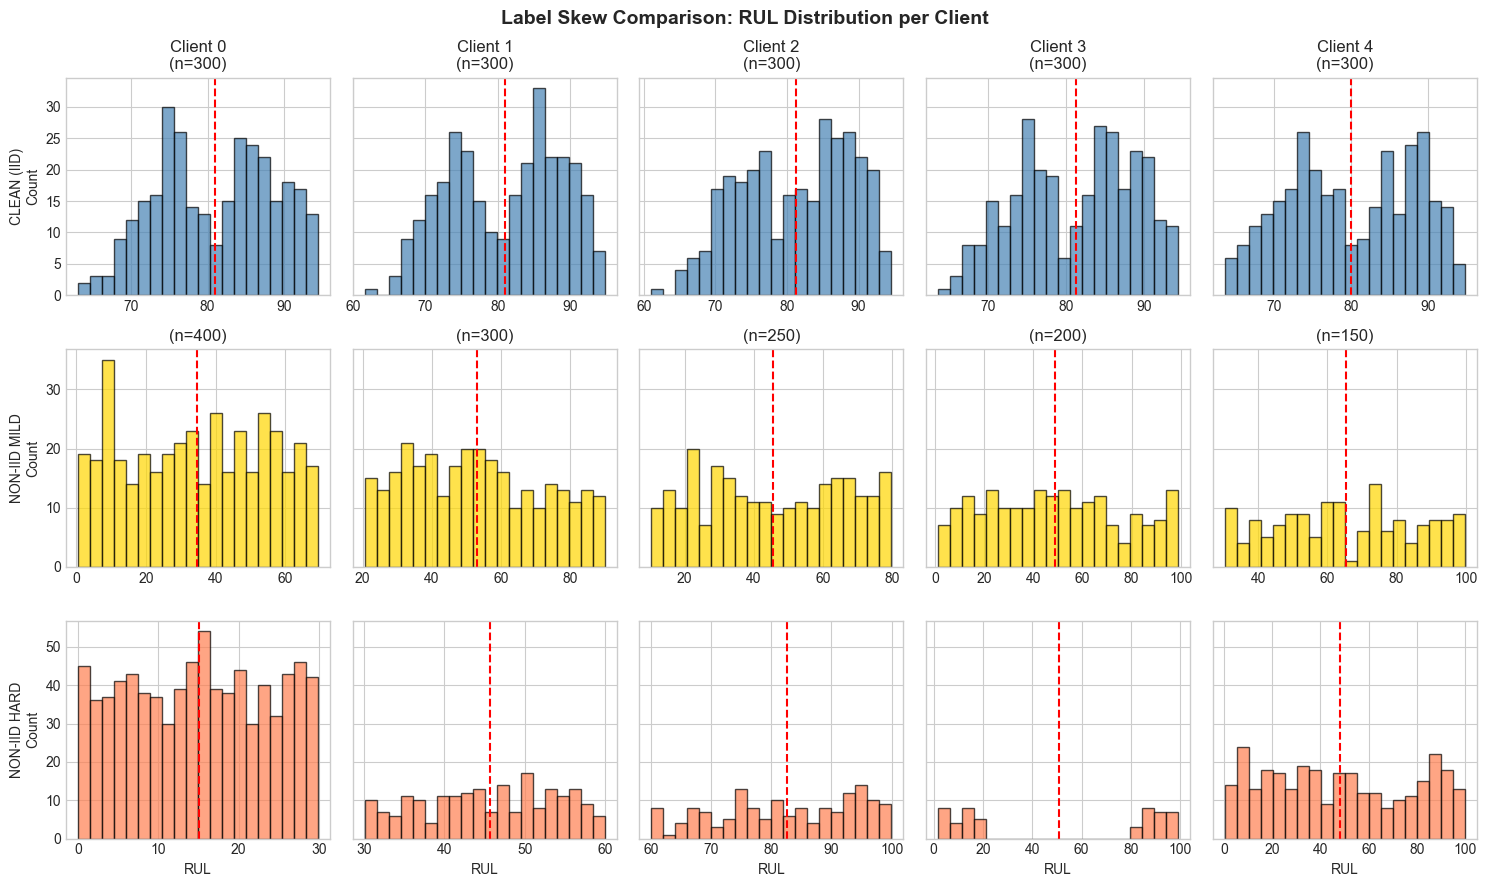


📊 Label Skew Summary:
  CLEAN:     Full RUL range [0, 100] uniformly distributed across all clients
  MILD:      Overlapping RUL ranges with moderate label skew
  HARD:      Non-overlapping RUL ranges with extreme label skew


In [21]:
fig, axes = plt.subplots(3, NUM_CLIENTS, figsize=(15, 9), sharey='row')

# Clean profile (IID)
for i, (X_c, y_c) in enumerate(clean_partitions):
    axes[0, i].hist(y_c, bins=20, alpha=0.7, color='steelblue', edgecolor='black')
    axes[0, i].set_title(f'Client {i}\n(n={len(y_c)})')
    axes[0, i].axvline(y_c.mean(), color='red', linestyle='--', label=f'mean={y_c.mean():.1f}')
    if i == 0:
        axes[0, i].set_ylabel('CLEAN (IID)\nCount')

# Non-IID Mild profile (moderate)
for i, (X_c, y_c) in enumerate(mild_partitions):
    axes[1, i].hist(y_c, bins=20, alpha=0.7, color='gold', edgecolor='black')
    axes[1, i].set_title(f'(n={len(y_c)})')
    axes[1, i].axvline(y_c.mean(), color='red', linestyle='--', label=f'mean={y_c.mean():.1f}')
    if i == 0:
        axes[1, i].set_ylabel('NON-IID MILD\nCount')

# Non-IID Hard profile (extreme)
for i, (X_c, y_c) in enumerate(hard_partitions):
    axes[2, i].hist(y_c, bins=20, alpha=0.7, color='coral', edgecolor='black')
    axes[2, i].set_xlabel('RUL')
    axes[2, i].axvline(y_c.mean(), color='red', linestyle='--', label=f'mean={y_c.mean():.1f}')
    if i == 0:
        axes[2, i].set_ylabel('NON-IID HARD\nCount')

fig.suptitle('Label Skew Comparison: RUL Distribution per Client', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Label Skew Summary:")
print(f"  CLEAN:     Full RUL range [0, 100] uniformly distributed across all clients")
print(f"  MILD:      Overlapping RUL ranges with moderate label skew")
print(f"  HARD:      Non-overlapping RUL ranges with extreme label skew")

## 3. Visualize Quantity Skew (Data Imbalance)

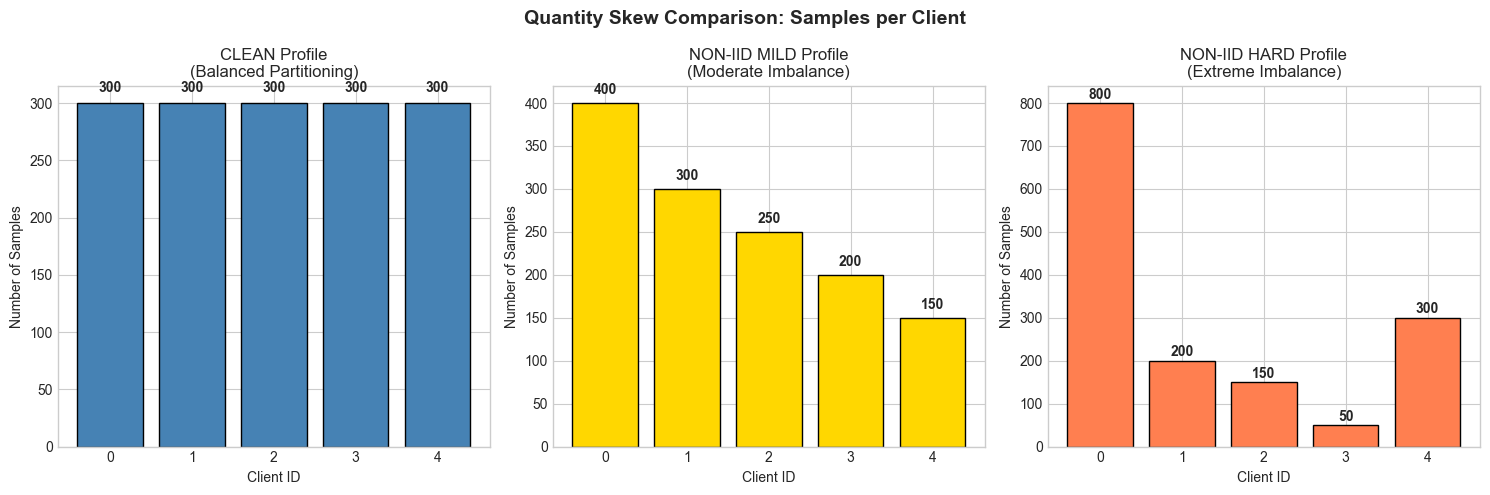


📊 Quantity Skew Summary (Max/Min ratio):
  CLEAN: 1.00x (perfectly balanced)
  MILD:  2.67x (moderate imbalance)
  HARD:  16.00x (extreme imbalance)


In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Clean profile sample counts (balanced)
clean_counts = [len(X_c) for X_c, _ in clean_partitions]
axes[0].bar(range(NUM_CLIENTS), clean_counts, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Client ID')
axes[0].set_ylabel('Number of Samples')
axes[0].set_title('CLEAN Profile\n(Balanced Partitioning)')
axes[0].set_xticks(range(NUM_CLIENTS))
for i, c in enumerate(clean_counts):
    axes[0].text(i, c + 10, str(c), ha='center', fontweight='bold')

# Non-IID Mild profile sample counts (moderate imbalance)
mild_counts = [len(X_c) for X_c, _ in mild_partitions]
axes[1].bar(range(NUM_CLIENTS), mild_counts, color='gold', edgecolor='black')
axes[1].set_xlabel('Client ID')
axes[1].set_ylabel('Number of Samples')
axes[1].set_title('NON-IID MILD Profile\n(Moderate Imbalance)')
axes[1].set_xticks(range(NUM_CLIENTS))
for i, c in enumerate(mild_counts):
    axes[1].text(i, c + 10, str(c), ha='center', fontweight='bold')

# Non-IID Hard profile sample counts (extreme imbalance)
hard_counts = [len(X_c) for X_c, _ in hard_partitions]
axes[2].bar(range(NUM_CLIENTS), hard_counts, color='coral', edgecolor='black')
axes[2].set_xlabel('Client ID')
axes[2].set_ylabel('Number of Samples')
axes[2].set_title('NON-IID HARD Profile\n(Extreme Imbalance)')
axes[2].set_xticks(range(NUM_CLIENTS))
for i, c in enumerate(hard_counts):
    axes[2].text(i, c + 10, str(c), ha='center', fontweight='bold')

fig.suptitle('Quantity Skew Comparison: Samples per Client', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print imbalance metrics
print("\n📊 Quantity Skew Summary (Max/Min ratio):")
print(f"  CLEAN: {max(clean_counts)/min(clean_counts):.2f}x (perfectly balanced)")
print(f"  MILD:  {max(mild_counts)/min(mild_counts):.2f}x (moderate imbalance)")
print(f"  HARD:  {max(hard_counts)/min(hard_counts):.2f}x (extreme imbalance)")

## 4. Visualize Feature Skew (Sensor Behavior)

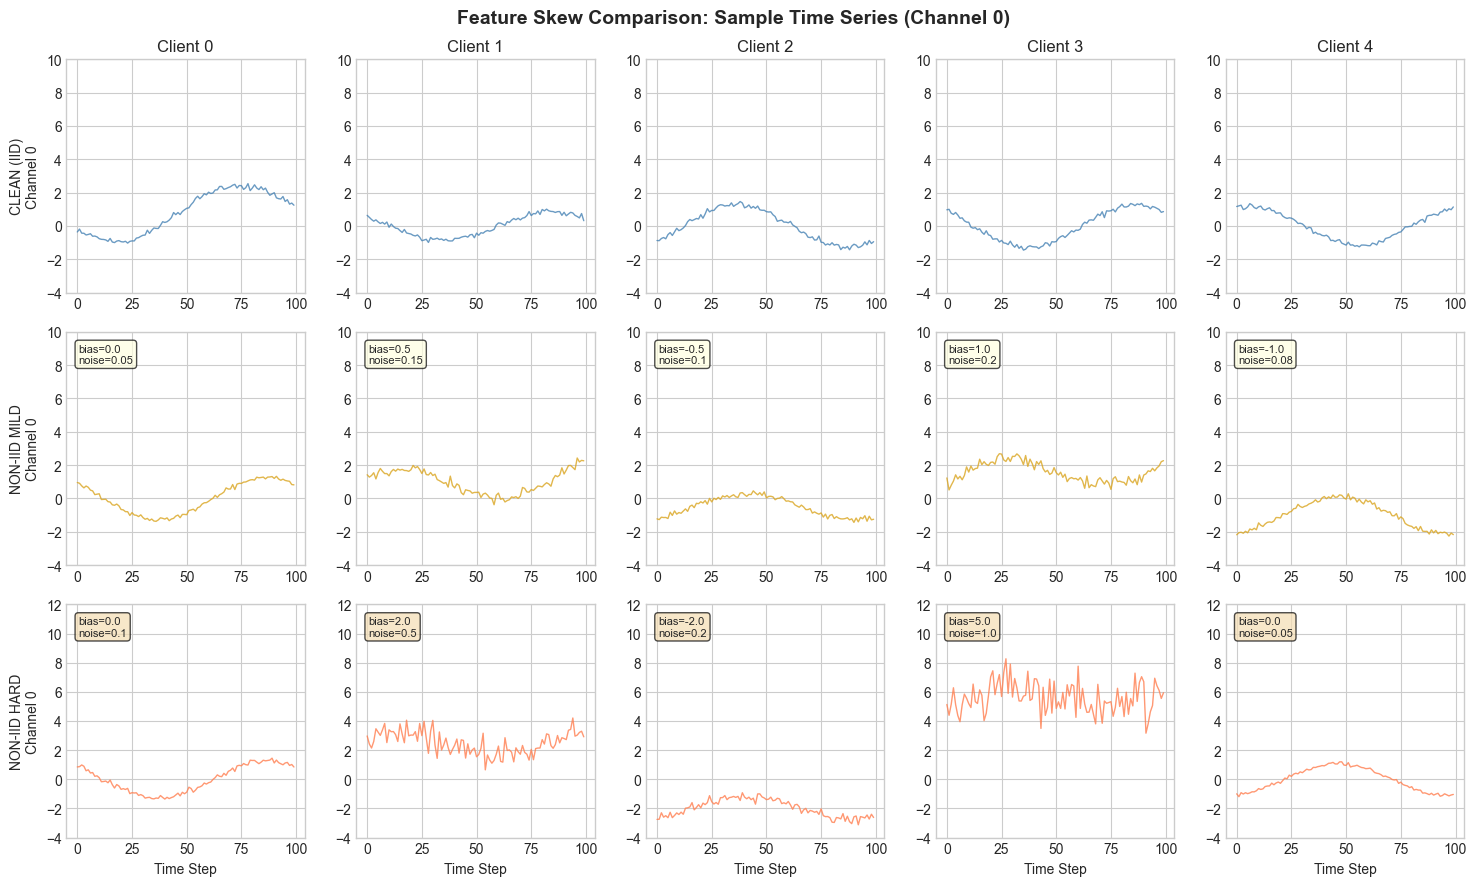


📊 Feature Skew Summary:
  CLEAN: No client-specific bias or noise variations
  MILD:  Noise ∈ [0.05, 0.2], Bias ∈ [-1, +1] (moderate)
  HARD:  Noise ∈ [0.1, 0.3], Bias ∈ [-2, +3] (extreme)


In [23]:
fig, axes = plt.subplots(3, NUM_CLIENTS, figsize=(15, 9))

channel_to_show = 0  # Show first channel

# Clean profile - sample time series (no bias/noise variation)
for i, (X_c, y_c) in enumerate(clean_partitions):
    sample_idx = 0
    axes[0, i].plot(X_c[sample_idx, :, channel_to_show], alpha=0.8, linewidth=1, color='steelblue')
    axes[0, i].set_title(f'Client {i}')
    if i == 0:
        axes[0, i].set_ylabel('CLEAN (IID)\nChannel 0')
    axes[0, i].set_ylim(-4, 10)

# Non-IID Mild profile - sample time series (moderate feature skew)
for i, (X_c, y_c) in enumerate(mild_partitions):
    sample_idx = 0
    axes[1, i].plot(X_c[sample_idx, :, channel_to_show], alpha=0.8, linewidth=1, color='goldenrod')
    if i == 0:
        axes[1, i].set_ylabel('NON-IID MILD\nChannel 0')
    # Annotate with bias/noise
    bias = MILD_CLIENT_BIAS.get(i, 0.0)
    noise = MILD_CLIENT_NOISE.get(i, 0.1)
    axes[1, i].text(0.05, 0.95, f'bias={bias}\nnoise={noise}', 
                    transform=axes[1, i].transAxes, fontsize=8, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
    axes[1, i].set_ylim(-4, 10)

# Non-IID Hard profile - sample time series (extreme feature skew)
for i, (X_c, y_c) in enumerate(hard_partitions):
    sample_idx = 0
    axes[2, i].plot(X_c[sample_idx, :, channel_to_show], alpha=0.8, linewidth=1, color='coral')
    axes[2, i].set_xlabel('Time Step')
    if i == 0:
        axes[2, i].set_ylabel('NON-IID HARD\nChannel 0')
    # Annotate with bias/noise
    bias = CLIENT_BIAS.get(i, 0.0)
    noise = CLIENT_NOISE.get(i, 0.15)
    axes[2, i].text(0.05, 0.95, f'bias={bias}\nnoise={noise}', 
                    transform=axes[2, i].transAxes, fontsize=8, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
    axes[2, i].set_ylim(-4, 12)

fig.suptitle('Feature Skew Comparison: Sample Time Series (Channel 0)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Feature Skew Summary:")
print(f"  CLEAN: No client-specific bias or noise variations")
print(f"  MILD:  Noise ∈ [0.05, 0.2], Bias ∈ [-1, +1] (moderate)")
print(f"  HARD:  Noise ∈ [0.1, 0.3], Bias ∈ [-2, +3] (extreme)")

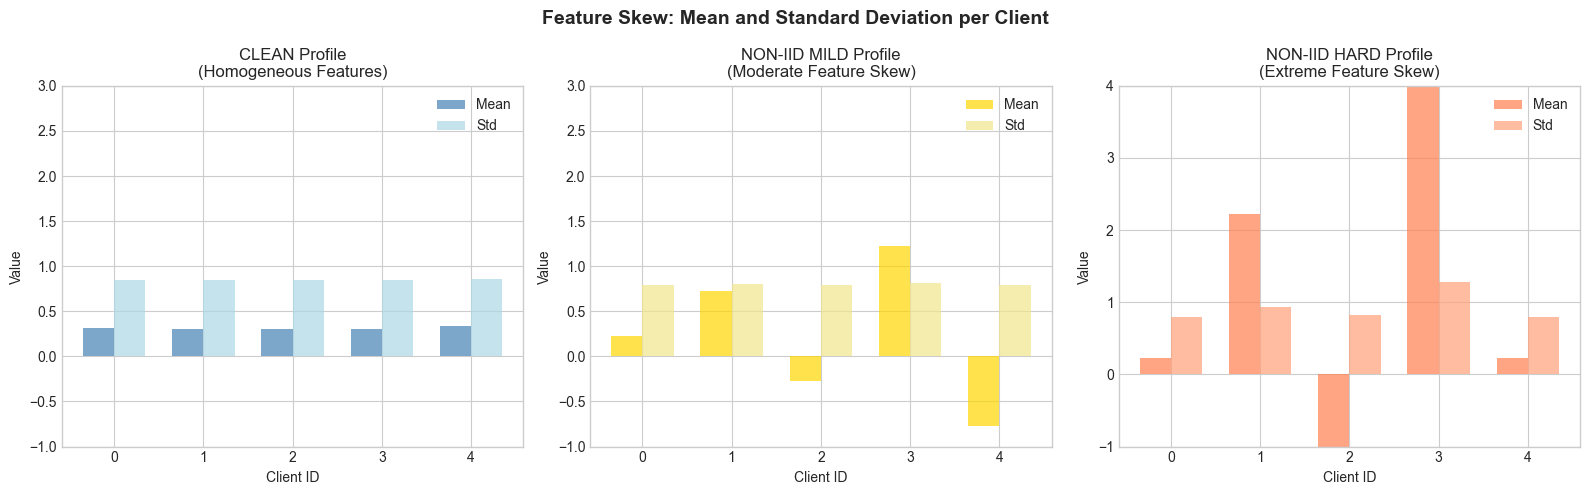


📊 Feature Statistics (Mean ± Std) per Client:

CLEAN:
  Client 0: 0.317 ± 0.849
  Client 1: 0.300 ± 0.849
  Client 2: 0.304 ± 0.851
  Client 3: 0.301 ± 0.846
  Client 4: 0.342 ± 0.858

MILD:
  Client 0: 0.223 ± 0.790
  Client 1: 0.726 ± 0.806
  Client 2: -0.271 ± 0.796
  Client 3: 1.227 ± 0.814
  Client 4: -0.767 ± 0.792

HARD:
  Client 0: 0.223 ± 0.795
  Client 1: 2.226 ± 0.936
  Client 2: -1.774 ± 0.817
  Client 3: 5.221 ± 1.278
  Client 4: 0.227 ± 0.791


In [24]:
# Show feature distribution statistics (Mean and Std) for all profiles
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

x = np.arange(NUM_CLIENTS)
width = 0.35

# Clean profile feature distribution
clean_means = [X_c.mean() for X_c, _ in clean_partitions]
clean_stds = [X_c.std() for X_c, _ in clean_partitions]
axes[0].bar(x - width/2, clean_means, width, label='Mean', color='steelblue', alpha=0.7)
axes[0].bar(x + width/2, clean_stds, width, label='Std', color='lightblue', alpha=0.7)
axes[0].set_xlabel('Client ID')
axes[0].set_ylabel('Value')
axes[0].set_title('CLEAN Profile\n(Homogeneous Features)')
axes[0].set_xticks(x)
axes[0].legend()
axes[0].set_ylim(-1, 3)

# Non-IID Mild profile feature distribution
mild_means = [X_c.mean() for X_c, _ in mild_partitions]
mild_stds = [X_c.std() for X_c, _ in mild_partitions]
axes[1].bar(x - width/2, mild_means, width, label='Mean', color='gold', alpha=0.7)
axes[1].bar(x + width/2, mild_stds, width, label='Std', color='khaki', alpha=0.7)
axes[1].set_xlabel('Client ID')
axes[1].set_ylabel('Value')
axes[1].set_title('NON-IID MILD Profile\n(Moderate Feature Skew)')
axes[1].set_xticks(x)
axes[1].legend()
axes[1].set_ylim(-1, 3)

# Non-IID Hard profile feature distribution
hard_means = [X_c.mean() for X_c, _ in hard_partitions]
hard_stds = [X_c.std() for X_c, _ in hard_partitions]
axes[2].bar(x - width/2, hard_means, width, label='Mean', color='coral', alpha=0.7)
axes[2].bar(x + width/2, hard_stds, width, label='Std', color='lightsalmon', alpha=0.7)
axes[2].set_xlabel('Client ID')
axes[2].set_ylabel('Value')
axes[2].set_title('NON-IID HARD Profile\n(Extreme Feature Skew)')
axes[2].set_xticks(x)
axes[2].legend()
axes[2].set_ylim(-1, 4)

fig.suptitle('Feature Skew: Mean and Standard Deviation per Client', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Statistical summary
print("\n📊 Feature Statistics (Mean ± Std) per Client:")
print("\nCLEAN:")
for i in range(NUM_CLIENTS):
    print(f"  Client {i}: {clean_means[i]:.3f} ± {clean_stds[i]:.3f}")
print("\nMILD:")
for i in range(NUM_CLIENTS):
    print(f"  Client {i}: {mild_means[i]:.3f} ± {mild_stds[i]:.3f}")
print("\nHARD:")
for i in range(NUM_CLIENTS):
    print(f"  Client {i}: {hard_means[i]:.3f} ± {hard_stds[i]:.3f}")

## 5. Summary Statistics Comparison

In [25]:
import pandas as pd

# Build comparison table for all three profiles
rows = []

for i in range(NUM_CLIENTS):
    X_clean_c, y_clean_c = clean_partitions[i]
    X_mild_c, y_mild_c = mild_partitions[i]
    X_hard_c, y_hard_c = hard_partitions[i]
    
    rows.append({
        'Client': i,
        'Profile': 'clean',
        'N_Samples': len(X_clean_c),
        'RUL_Mean': y_clean_c.mean(),
        'RUL_Std': y_clean_c.std(),
        'RUL_Min': y_clean_c.min(),
        'RUL_Max': y_clean_c.max(),
        'X_Mean': X_clean_c.mean(),
        'X_Std': X_clean_c.std(),
    })
    rows.append({
        'Client': i,
        'Profile': 'non_iid_mild',
        'N_Samples': len(X_mild_c),
        'RUL_Mean': y_mild_c.mean(),
        'RUL_Std': y_mild_c.std(),
        'RUL_Min': y_mild_c.min(),
        'RUL_Max': y_mild_c.max(),
        'X_Mean': X_mild_c.mean(),
        'X_Std': X_mild_c.std(),
    })
    rows.append({
        'Client': i,
        'Profile': 'non_iid_hard',
        'N_Samples': len(X_hard_c),
        'RUL_Mean': y_hard_c.mean(),
        'RUL_Std': y_hard_c.std(),
        'RUL_Min': y_hard_c.min(),
        'RUL_Max': y_hard_c.max(),
        'X_Mean': X_hard_c.mean(),
        'X_Std': X_hard_c.std(),
    })

df = pd.DataFrame(rows)
print("\n" + "="*80)
print("COMPLETE COMPARISON TABLE (All Three Profiles)")
print("="*80)
display(df.round(2))


COMPLETE COMPARISON TABLE (All Three Profiles)


,Client,Profile,N_Samples,RUL_Mean,RUL_Std,RUL_Min,RUL_Max,X_Mean,X_Std
0,0,clean,300,81.03,7.61,63.03,94.49,0.32,0.85
1,0,non_iid_mild,400,34.76,19.93,0.52,69.47,0.22,0.79
2,0,non_iid_hard,800,15.01,8.66,0.03,29.87,0.22,0.79
3,1,clean,300,81.01,7.68,61.64,94.77,0.30,0.85
4,1,non_iid_mild,300,53.07,19.24,20.62,89.95,0.73,0.81
5,1,non_iid_hard,200,45.63,8.26,30.08,59.98,2.23,0.94
6,2,clean,300,81.26,7.65,61.05,94.61,0.30,0.85
7,2,non_iid_mild,250,45.60,20.41,10.40,79.72,-0.27,0.80
8,2,non_iid_hard,150,82.58,11.36,60.03,99.98,-1.77,0.82
9,3,clean,300,81.22,7.49,63.53,94.36,0.30,0.85


In [26]:
# Compute heterogeneity metrics for all three profiles
def compute_heterogeneity_metrics(partitions, profile_name):
    n_samples = [len(X_c) for X_c, _ in partitions]
    y_means = [y_c.mean() for _, y_c in partitions]
    x_means = [X_c.mean() for X_c, _ in partitions]
    x_stds = [X_c.std() for X_c, _ in partitions]
    
    return {
        'Profile': profile_name,
        'Sample Imbalance (max/min)': max(n_samples) / min(n_samples),
        'RUL Mean Variance': np.var(y_means),
        'Feature Mean Variance': np.var(x_means),
        'Feature Std Variance': np.var(x_stds),
    }

metrics_clean = compute_heterogeneity_metrics(clean_partitions, 'clean')
metrics_mild = compute_heterogeneity_metrics(mild_partitions, 'non_iid_mild')
metrics_hard = compute_heterogeneity_metrics(hard_partitions, 'non_iid_hard')

metrics_df = pd.DataFrame([metrics_clean, metrics_mild, metrics_hard])
print("\n" + "="*80)
print("HETEROGENEITY METRICS (Quantitative Comparison)")
print("(Higher values = more heterogeneous)")
print("="*80)
display(metrics_df.round(4))

print("\n📊 Interpretation:")
print("  • Sample Imbalance: 1.0 = balanced, higher = more imbalanced")
print("  • RUL Mean Variance: 0 = identical distributions, higher = more label skew")
print("  • Feature Mean/Std Variance: 0 = identical features, higher = more feature skew")
print("\n✅ Expected ordering: clean < mild < hard for all metrics")


HETEROGENEITY METRICS (Quantitative Comparison)
(Higher values = more heterogeneous)


,Profile,Sample Imbalance (max/min),RUL Mean Variance,Feature Mean Variance,Feature Std Variance
0,clean,1.0000,0.2358,0.0002,0.0000
1,non_iid_mild,2.6667,99.2518,0.4969,0.0001
2,non_iid_hard,16.0000,459.3973,5.5938,0.0342



📊 Interpretation:
  • Sample Imbalance: 1.0 = balanced, higher = more imbalanced
  • RUL Mean Variance: 0 = identical distributions, higher = more label skew
  • Feature Mean/Std Variance: 0 = identical features, higher = more feature skew

✅ Expected ordering: clean < mild < hard for all metrics


## 7. View Raw Data (Rows, Columns, Features, Values)

In [40]:
# View data shapes and structure for all three profiles
print("=" * 80)
print("DATA STRUCTURE OVERVIEW")
print("=" * 80)

print("\n📊 CLEAN PROFILE:")
print(f"   X_clean shape: {X_clean.shape}")
print(f"   y_clean shape: {y_clean.shape}")
print(f"   X dimensions: (num_samples, seq_length, num_channels) = ({X_clean.shape[0]}, {X_clean.shape[1]}, {X_clean.shape[2]})")
print(f"   Data type: X={X_clean.dtype}, y={y_clean.dtype}")

print("\n📊 NON-IID MILD PROFILE:")
for i, (X_c, y_c) in enumerate(mild_partitions):
    print(f"   Client {i}: X shape={X_c.shape}, y shape={y_c.shape}")

print("\n📊 NON-IID HARD PROFILE:")
for i, (X_c, y_c) in enumerate(hard_partitions):
    print(f"   Client {i}: X shape={X_c.shape}, y shape={y_c.shape}")

DATA STRUCTURE OVERVIEW

📊 CLEAN PROFILE:
   X_clean shape: (1500, 100, 14)
   y_clean shape: (1500,)
   X dimensions: (num_samples, seq_length, num_channels) = (1500, 100, 14)
   Data type: X=float32, y=float32

📊 NON-IID MILD PROFILE:
   Client 0: X shape=(400, 100, 14), y shape=(400,)
   Client 1: X shape=(300, 100, 14), y shape=(300,)
   Client 2: X shape=(250, 100, 14), y shape=(250,)
   Client 3: X shape=(200, 100, 14), y shape=(200,)
   Client 4: X shape=(150, 100, 14), y shape=(150,)

📊 NON-IID HARD PROFILE:
   Client 0: X shape=(800, 100, 14), y shape=(800,)
   Client 1: X shape=(200, 100, 14), y shape=(200,)
   Client 2: X shape=(150, 100, 14), y shape=(150,)
   Client 3: X shape=(50, 100, 14), y shape=(50,)
   Client 4: X shape=(300, 100, 14), y shape=(300,)


In [41]:
# View CLEAN profile data - convert 3D time series to 2D DataFrame for inspection
print("=" * 80)
print("CLEAN PROFILE - Sample Data (First 5 samples, First 5 time steps)")
print("=" * 80)

# For clean data, show the first client's partition
X_sample, y_sample = clean_partitions[0]

# Create a DataFrame showing feature values at first time step for first few samples
print("\n📊 Feature values at time step 0 (first 5 samples):")
feature_cols = [f'Channel_{i}' for i in range(NUM_CHANNELS)]
df_clean_features = pd.DataFrame(
    X_sample[:5, 0, :],  # First 5 samples, time step 0, all channels
    columns=feature_cols
)
df_clean_features['RUL_Target'] = y_sample[:5]
display(df_clean_features.round(3))

# Show time series for first sample across all time steps (first 5 channels)
print("\n📊 Time series for Sample 0 (first 10 time steps, first 5 channels):")
df_clean_ts = pd.DataFrame(
    X_sample[0, :10, :5],  # First sample, first 10 time steps, first 5 channels
    columns=[f'Ch_{i}' for i in range(5)],
    index=[f't={i}' for i in range(10)]
)
display(df_clean_ts.round(3))

print(f"\n📊 RUL values (first 10 samples): {y_sample[:10].round(1)}")

CLEAN PROFILE - Sample Data (First 5 samples, First 5 time steps)

📊 Feature values at time step 0 (first 5 samples):


,Channel_0,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_9,Channel_10,Channel_11,Channel_12,Channel_13,RUL_Target
0,-0.363,0.950,1.477,-0.494,-0.814,-0.143,-0.887,0.186,-0.859,0.999,-0.652,0.701,-0.526,0.933,74.599998
1,0.679,0.700,-0.130,1.132,-0.585,0.392,-0.465,-1.077,0.022,-0.090,0.117,-0.683,0.764,0.971,70.577003
2,-1.052,0.708,-0.538,-0.581,-0.884,-0.864,-1.113,0.719,-0.584,-0.158,1.025,0.139,0.567,0.774,92.441002
3,0.307,0.231,0.086,0.259,-0.960,0.873,0.162,-1.185,-0.304,-0.088,-0.689,0.224,1.194,-0.284,91.384003
4,-0.932,-0.453,-0.172,-1.165,1.183,-0.539,0.574,0.844,-0.878,-0.732,-0.369,0.822,0.413,0.621,88.483002



📊 Time series for Sample 0 (first 10 time steps, first 5 channels):


,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4
t=0,-0.363,0.950,1.477,-0.494,-0.814
t=1,-0.191,1.089,0.951,-0.173,-0.945
t=2,-0.438,1.171,1.237,-0.217,-0.984
t=3,-0.441,1.055,1.267,0.099,-1.046
t=4,-0.545,1.463,1.431,0.049,-1.132
t=5,-0.513,1.314,1.210,0.418,-0.964
t=6,-0.471,1.178,1.168,0.517,-1.098
t=7,-0.622,1.316,1.126,0.602,-1.123
t=8,-0.611,1.217,0.915,0.847,-0.820
t=9,-0.659,1.188,0.916,0.790,-0.674



📊 RUL values (first 10 samples): [74.6 70.6 92.4 91.4 88.5 84.9 73.8 92.4 74.9 94.2]


In [42]:
# View NON-IID MILD profile data for each client
print("=" * 80)
print("NON-IID MILD PROFILE - Sample Data per Client")
print("=" * 80)

for client_id in range(NUM_CLIENTS):
    X_c, y_c = mild_partitions[client_id]
    
    print(f"\n{'─' * 60}")
    print(f"📊 CLIENT {client_id} (n={len(X_c)} samples)")
    print(f"{'─' * 60}")
    
    # Show feature values at time step 0 for first 3 samples
    df_mild = pd.DataFrame(
        X_c[:3, 0, :5],  # First 3 samples, time step 0, first 5 channels
        columns=[f'Ch_{i}' for i in range(5)]
    )
    df_mild['RUL'] = y_c[:3]
    df_mild.index = [f'Sample_{i}' for i in range(3)]
    display(df_mild.round(3))
    
    # Show RUL range
    print(f"   RUL range: [{y_c.min():.1f}, {y_c.max():.1f}], mean: {y_c.mean():.1f}")

NON-IID MILD PROFILE - Sample Data per Client

────────────────────────────────────────────────────────────
📊 CLIENT 0 (n=400 samples)
────────────────────────────────────────────────────────────


,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4,RUL
Sample_0,0.955,1.116,-0.083,-0.505,-1.109,54.177
Sample_1,0.998,-0.540,0.187,0.483,-0.595,30.721
Sample_2,0.311,-0.919,-0.387,-0.593,-1.157,60.102


   RUL range: [0.5, 69.5], mean: 34.8

────────────────────────────────────────────────────────────
📊 CLIENT 1 (n=300 samples)
────────────────────────────────────────────────────────────


,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4,RUL
Sample_0,1.419,0.935,1.005,1.220,-0.398,43.784
Sample_1,0.101,1.551,0.039,-0.228,1.056,86.024
Sample_2,1.334,-0.021,0.786,0.176,-0.224,49.162


   RUL range: [20.6, 90.0], mean: 53.1

────────────────────────────────────────────────────────────
📊 CLIENT 2 (n=250 samples)
────────────────────────────────────────────────────────────


,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4,RUL
Sample_0,-1.227,-1.463,-0.618,-0.673,0.716,48.201
Sample_1,-0.814,-0.683,0.089,0.689,-1.008,38.977
Sample_2,-0.794,-1.341,-1.061,-1.027,0.117,30.163


   RUL range: [10.4, 79.7], mean: 45.6

────────────────────────────────────────────────────────────
📊 CLIENT 3 (n=200 samples)
────────────────────────────────────────────────────────────


,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4,RUL
Sample_0,1.230,0.041,1.251,0.721,0.255,76.285
Sample_1,2.016,0.293,0.047,0.204,1.394,46.104
Sample_2,1.019,1.512,1.376,0.306,1.404,83.568


   RUL range: [1.3, 99.0], mean: 49.0

────────────────────────────────────────────────────────────
📊 CLIENT 4 (n=150 samples)
────────────────────────────────────────────────────────────


,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4,RUL
Sample_0,-2.182,-1.191,-1.924,-0.485,-0.045,72.928
Sample_1,-1.350,-1.125,-0.741,-0.303,-1.038,59.571
Sample_2,-2.001,-1.724,-0.724,-1.723,-1.803,44.058


   RUL range: [30.3, 99.7], mean: 65.3


In [43]:
# View NON-IID HARD profile data for each client
print("=" * 80)
print("NON-IID HARD PROFILE - Sample Data per Client")
print("=" * 80)

for client_id in range(NUM_CLIENTS):
    X_c, y_c = hard_partitions[client_id]
    
    print(f"\n{'─' * 60}")
    print(f"📊 CLIENT {client_id} (n={len(X_c)} samples)")
    print(f"{'─' * 60}")
    
    # Show feature values at time step 0 for first 3 samples
    df_hard = pd.DataFrame(
        X_c[:10, 0, :5],  # First 3 samples, time step 0, first 5 channels
        columns=[f'Ch_{i}' for i in range(5)]
    )
    df_hard['RUL'] = y_c[:10]
    df_hard.index = [f'Sample_{i}' for i in range(10)]
    display(df_hard.round(10))
    
    # Show RUL range
    print(f"   RUL range: [{y_c.min():.1f}, {y_c.max():.1f}], mean: {y_c.mean():.1f}")

NON-IID HARD PROFILE - Sample Data per Client

────────────────────────────────────────────────────────────
📊 CLIENT 0 (n=800 samples)
────────────────────────────────────────────────────────────


,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4,RUL
Sample_0,0.848040,1.046344,-0.135742,-0.398069,-1.007851,11.594588
Sample_1,0.961139,-0.376241,0.137953,0.424827,-0.617602,6.902724
Sample_2,0.416142,-0.949963,-0.384373,-0.603051,-1.242790,5.081850
Sample_3,-0.975572,0.546192,-1.038664,-1.219647,-0.415760,7.728324
Sample_4,-0.383715,0.851294,-0.314513,0.419220,0.217747,23.484972
Sample_5,0.590338,-0.635424,0.556887,1.098887,1.418934,25.707388
Sample_6,-0.819461,-0.394348,-1.215769,0.054242,-0.481878,19.992807
Sample_7,0.225493,-0.864191,-1.018292,0.716550,0.851386,20.133978
Sample_8,0.896553,0.720014,0.768759,-0.362925,0.042266,10.826808
Sample_9,-0.613038,0.646875,-0.251665,0.118167,-0.015629,15.802835


   RUL range: [0.0, 29.9], mean: 15.0

────────────────────────────────────────────────────────────
📊 CLIENT 1 (n=200 samples)
────────────────────────────────────────────────────────────


,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4,RUL
Sample_0,2.971314,2.396656,2.296393,1.949146,1.168951,56.093605
Sample_1,1.854985,2.226920,1.824874,1.521911,2.566177,50.085968
Sample_2,2.857058,1.293420,1.107113,1.531372,1.383239,45.976372
Sample_3,2.439707,1.533453,3.860855,2.945491,1.268337,55.050278
Sample_4,2.620403,2.942704,1.713067,2.031293,0.395920,49.823994
Sample_5,2.012954,1.809714,3.420814,2.195060,2.342595,46.960056
Sample_6,0.664077,0.498842,0.186208,3.729740,0.563481,42.195232
Sample_7,2.348146,0.390680,3.326534,2.563932,3.067096,33.367878
Sample_8,2.509084,0.956511,3.178634,2.613723,1.477247,44.929661
Sample_9,2.667176,2.303653,3.096680,2.798455,2.127040,53.037498


   RUL range: [30.1, 60.0], mean: 45.6

────────────────────────────────────────────────────────────
📊 CLIENT 2 (n=150 samples)
────────────────────────────────────────────────────────────


,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4,RUL
Sample_0,-2.749640,-3.093141,-2.009635,-1.908317,-0.912769,98.255791
Sample_1,-2.100271,-1.906551,-1.148176,-0.876357,-2.355476,67.721733
Sample_2,-2.281920,-2.962066,-2.563328,-2.767212,-1.538295,88.778931
Sample_3,-2.376851,-2.984125,-0.776904,-2.867043,-2.601185,79.553787
Sample_4,-2.839269,-2.969210,-2.798098,-1.056978,-0.831330,89.263863
Sample_5,-1.023886,-2.023848,-3.133392,-2.165066,-2.440427,77.393219
Sample_6,-1.071442,-2.447614,-2.371226,-2.571847,-2.134541,71.864838
Sample_7,-1.329273,-2.396252,-2.724090,-3.211162,-2.223828,99.071312
Sample_8,-2.670717,-2.461710,-1.652884,-1.229063,-1.554629,97.997261
Sample_9,-3.066170,-1.462936,-3.200481,-2.190453,-1.283522,95.889603


   RUL range: [60.0, 100.0], mean: 82.6

────────────────────────────────────────────────────────────
📊 CLIENT 3 (n=50 samples)
────────────────────────────────────────────────────────────


,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4,RUL
Sample_0,5.132049,5.814164,6.930629,4.370114,4.160949,97.971359
Sample_1,6.823761,3.670770,4.322793,4.705121,5.305305,11.182312
Sample_2,2.999650,5.888987,2.347474,3.383568,5.820116,2.513559
Sample_3,5.980781,5.909438,4.499800,4.552657,5.900786,91.779274
Sample_4,5.065190,6.333251,3.538727,5.591775,6.127433,95.032593
Sample_5,3.756761,3.027699,5.330554,4.092736,1.225580,4.517182
Sample_6,4.015684,7.129860,5.404828,4.340442,3.353907,10.537429
Sample_7,3.556858,3.495880,3.857520,3.663380,3.849442,18.373940
Sample_8,5.598650,4.716129,5.445448,6.784463,4.303226,95.579475
Sample_9,6.091987,4.085911,5.190300,4.448442,6.390469,97.043175


   RUL range: [1.8, 99.2], mean: 50.9

────────────────────────────────────────────────────────────
📊 CLIENT 4 (n=300 samples)
────────────────────────────────────────────────────────────


,Ch_0,Ch_1,Ch_2,Ch_3,Ch_4,RUL
Sample_0,-0.996974,-0.211628,-0.876388,0.536415,0.775475,37.292191
Sample_1,-0.310565,-0.187308,0.228779,0.658437,-0.044813,31.290848
Sample_2,-1.132914,-0.808770,0.471055,-0.750515,-0.743668,32.038929
Sample_3,0.087498,0.728251,-0.943047,1.034324,0.629713,92.868774
Sample_4,-1.005297,1.005841,0.672590,0.687396,-0.215948,8.425282
Sample_5,0.660429,0.419357,-0.044673,-0.277201,0.787771,49.084545
Sample_6,-0.789098,-1.194840,-0.810316,-0.723127,1.140326,34.847828
Sample_7,-0.046885,-0.079734,0.660793,-0.167308,-0.863344,91.818810
Sample_8,-0.948804,0.119115,-0.053399,1.049199,-0.692743,5.858956
Sample_9,-0.273879,0.862467,0.844399,-0.600463,0.553669,12.128592


   RUL range: [0.3, 99.8], mean: 48.3


In [44]:
# Side-by-side comparison of same client (Client 0) across all profiles
print("=" * 80)
print("SIDE-BY-SIDE COMPARISON - Client 0 Across All Profiles")
print("=" * 80)

# Get Client 0 data from each profile
X_clean_0, y_clean_0 = clean_partitions[0]
X_mild_0, y_mild_0 = mild_partitions[0]
X_hard_0, y_hard_0 = hard_partitions[0]

# Create comparison table for first sample, first time step, all channels
print("\n📊 First Sample, Time Step 0 - Feature Values Comparison:")
comparison_df = pd.DataFrame({
    'Channel': [f'Ch_{i}' for i in range(NUM_CHANNELS)],
    'CLEAN': X_clean_0[0, 0, :].round(3),
    'NON-IID MILD': X_mild_0[0, 0, :].round(3),
    'NON-IID HARD': X_hard_0[0, 0, :].round(3),
})
comparison_df = comparison_df.set_index('Channel')
display(comparison_df)

# Show differences
print("\n📊 Feature Value Differences (vs CLEAN baseline):")
diff_df = pd.DataFrame({
    'Channel': [f'Ch_{i}' for i in range(NUM_CHANNELS)],
    'MILD - CLEAN': (X_mild_0[0, 0, :] - X_clean_0[0, 0, :]).round(3),
    'HARD - CLEAN': (X_hard_0[0, 0, :] - X_clean_0[0, 0, :]).round(3),
})
diff_df = diff_df.set_index('Channel')
display(diff_df)

print("\n📊 RUL Target Comparison:")
print(f"   CLEAN:    First 5 RUL values = {y_clean_0[:5].round(1)}")
print(f"   MILD:     First 5 RUL values = {y_mild_0[:5].round(1)}")
print(f"   HARD:     First 5 RUL values = {y_hard_0[:5].round(1)}")

SIDE-BY-SIDE COMPARISON - Client 0 Across All Profiles

📊 First Sample, Time Step 0 - Feature Values Comparison:


,CLEAN,NON-IID MILD,NON-IID HARD
Channel,,,
Ch_0,-0.363,0.955,0.848
Ch_1,0.950,1.116,1.046
Ch_2,1.477,-0.083,-0.136
Ch_3,-0.494,-0.505,-0.398
Ch_4,-0.814,-1.109,-1.008
Ch_5,-0.143,-0.123,-0.087
Ch_6,-0.887,-0.458,-0.389
Ch_7,0.186,-0.188,-0.299
Ch_8,-0.859,-0.336,-0.382



📊 Feature Value Differences (vs CLEAN baseline):


,MILD - CLEAN,HARD - CLEAN
Channel,,
Ch_0,1.319,1.212
Ch_1,0.165,0.096
Ch_2,-1.561,-1.613
Ch_3,-0.012,0.095
Ch_4,-0.295,-0.194
Ch_5,0.020,0.057
Ch_6,0.429,0.498
Ch_7,-0.374,-0.485
Ch_8,0.524,0.477



📊 RUL Target Comparison:
   CLEAN:    First 5 RUL values = [74.6 70.6 92.4 91.4 88.5]
   MILD:     First 5 RUL values = [54.2 30.7 60.1 48.8  6.6]
   HARD:     First 5 RUL values = [11.6  6.9  5.1  7.7 23.5]


## 6. Expected Experimental Behavior

| Profile | Difficulty | Description |
|---------|------------|-------------|
| `clean` | Easiest | IID data - uniform distribution, no skew |
| `non_iid_mild` | Moderate | Overlapping RUL ranges, moderate feature/quantity skew |
| `non_iid_hard` | Hardest | Non-overlapping RUL, extreme feature/quantity skew |

### Expected Performance Ordering:
- **Federated + clean**: Federated ≈ Centralized (data is IID)
- **Federated + mild**: Federated < Centralized, moderate performance gap
- **Federated + hard**: Federated << Centralized, but >> Local-only

### What Each Profile Tests:
| Profile | Tests |
|---------|-------|
| `clean` | Baseline FL correctness, algorithm validity |
| `non_iid_mild` | Moderate heterogeneity resilience, practical scenarios |
| `non_iid_hard` | Extreme robustness, worst-case analysis, algorithm limits |

### Key Insight
The three profiles form a **difficulty ladder**: `clean < mild < hard`
- Use `clean` for sanity checks and debugging
- Use `non_iid_mild` for realistic industrial scenarios  
- Use `non_iid_hard` for stress testing and robustness evaluation

In [15]:
print("\n" + "="*60)
print("USAGE INSTRUCTIONS")
print("="*60)
print("""
To use the data profiles in experiments:

1. In YAML config:
   data_profile: "clean"         # IID (easiest)
   data_profile: "non_iid_mild"  # Moderate heterogeneity
   data_profile: "non_iid_hard"  # Extreme heterogeneity (hardest)

2. From command line (federated_matrix.py):
   python -m experiments.federated_matrix --data-profile clean
   python -m experiments.federated_matrix --data-profile non_iid_mild
   python -m experiments.federated_matrix --data-profile non_iid_hard

3. In Python:
   config = FederatedExperimentConfig(data_profile="non_iid_mild")
   experiment = FederatedExperiment(config)
   results = experiment.run()

NOTE: Changing data_profile ONLY affects data generation.
Training loops, model architecture, aggregation (FedAvg/FedProx),
DP mechanisms, metrics, logging, and random seed handling
remain UNCHANGED.
""")

print("\n✅ Notebook 03 complete: Three-way data profile comparison")


USAGE INSTRUCTIONS

To use the data profiles in experiments:

1. In YAML config:
   data_profile: "clean"         # IID (easiest)
   data_profile: "non_iid_mild"  # Moderate heterogeneity
   data_profile: "non_iid_hard"  # Extreme heterogeneity (hardest)

2. From command line (federated_matrix.py):
   python -m experiments.federated_matrix --data-profile clean
   python -m experiments.federated_matrix --data-profile non_iid_mild
   python -m experiments.federated_matrix --data-profile non_iid_hard

3. In Python:
   config = FederatedExperimentConfig(data_profile="non_iid_mild")
   experiment = FederatedExperiment(config)
   results = experiment.run()

NOTE: Changing data_profile ONLY affects data generation.
Training loops, model architecture, aggregation (FedAvg/FedProx),
DP mechanisms, metrics, logging, and random seed handling
remain UNCHANGED.


✅ Notebook 03 complete: Three-way data profile comparison
